In [1]:
import os
import numpy as np
import PIL
from PIL import Image
#import PIL.Image
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn.model_selection import train_test_split
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D, LeakyReLU, Conv3D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D, MaxPooling3D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)
print(PIL.__version__)

Tensorflow version: 2.4.0-dev20200724
7.2.0


In [2]:
train_lung_dir = '/Users/rakshitdwivedi/Desktop/AI/Lung & Colon cancer/lung_colon_image_set/lung_image_sets'
train_colon_dir = '/Users/rakshitdwivedi/Desktop/AI/Lung & Colon cancer/lung_colon_image_set/colon_image_sets'

train_lung_aca_dir = '/Users/rakshitdwivedi/Desktop/AI/Lung & Colon cancer/lung_colon_image_set/lung_image_sets/lung_aca'
train_lung_n_dir = '/Users/rakshitdwivedi/Desktop/AI/Lung & Colon cancer/lung_colon_image_set/lung_image_sets/lung_n'
train_lung_scc_dir = '/Users/rakshitdwivedi/Desktop/AI/Lung & Colon cancer/lung_colon_image_set/lung_image_sets/lung_scc'
train_colon_aca_dir = '/Users/rakshitdwivedi/Desktop/AI/Lung & Colon cancer/lung_colon_image_set/colon_image_sets/colon_aca'
train_colon_n_dir = '/Users/rakshitdwivedi/Desktop/AI/Lung & Colon cancer/lung_colon_image_set/colon_image_sets/colon_n'

print('total lung aca images' , len(os.listdir(train_lung_aca_dir)))
print('total lung n images' , len(os.listdir(train_lung_n_dir)))
print('total lung scc images' , len(os.listdir(train_lung_scc_dir)))
print('total colon aca images' , len(os.listdir(train_colon_aca_dir)))
print('total colon n images' , len(os.listdir(train_colon_n_dir)))

total lung aca images 5000
total lung n images 5000
total lung scc images 5000
total colon aca images 5000
total colon n images 5000


In [3]:
def mylistdir(directory):
    """A specialized version of os.listdir() that ignores files that
    start with a leading period."""
    filelist = os.listdir(directory)
    return [x for x in filelist
            if not (x.startswith('.'))]

unique_labels =  ['lung_aca', 'lung_n', 'lung_scc']


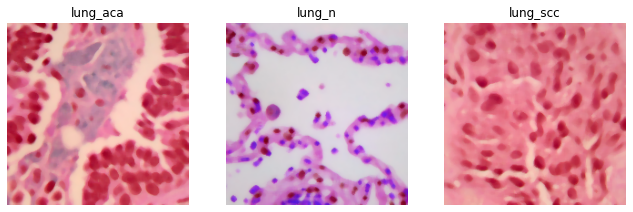

In [13]:
def load_unique_lung():
    size_img = 200,200 
    images_for_plot = []
    labels_for_plot = []
    for folder in mylistdir(train_lung_dir):
        for file in mylistdir(train_lung_dir + '/' + folder):
            filepath = train_lung_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            #final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2GRAY)
            final_img = cv2.medianBlur(final_img,5)
            #final_img = cv2.threshold(final_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique_lung()
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images_lung(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 1
col = 4
for i in range(1,(row*col)):
    plot_images_lung(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1  
plt.show()

unique_labels =  ['colon_n', 'colon_aca']


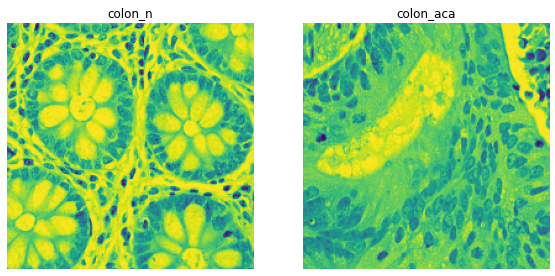

In [5]:
def load_unique_colon():
    size_img = 200,200 
    images_for_plot = []
    labels_for_plot = []
    for folder in mylistdir(train_colon_dir):
        for file in mylistdir(train_colon_dir + '/' + folder):
            filepath = train_colon_dir + '/' + folder + '/' + file
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2GRAY)
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique_colon()
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images_colon(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 1
col = 3
for i in range(1,(row*col)):
    plot_images_colon(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1  
plt.show()

In [6]:
labels_lung_dict = {'lung_aca':0,'lung_n':1,'lung_scc':2}


def load_lung_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    
    
    images = []
    labels = []
    size = 200,200
    print("LOADING DATA FROM : ",end = "")
    for folder in mylistdir(train_lung_dir):
        print(folder, end = ' | ')
        for image in mylistdir(train_lung_dir + "/" + folder):
            temp_img = cv2.imread(train_lung_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            temp_img = cv2.medianBlur(final_img,5)
            temp_img = cv2.threshold(final_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
            images.append(temp_img)
            labels.append(labels_lung_dict[folder])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = tf.keras.utils.to_categorical(labels)
    
    X1_train, X1_test, Y1_train, Y1_test = train_test_split(images, labels, test_size = 0.05)
    
    print()
    print('Loaded', len(X1_train),'images for training,','Train data shape =',X1_train.shape)
    print('Loaded', len(X1_test),'images for testing','Test data shape =',X1_test.shape)
    
    return X1_train, X1_test, Y1_train, Y1_test

In [7]:
X1_train, X1_test, Y1_train, Y1_test = load_lung_data()

LOADING DATA FROM : lung_aca | lung_n | lung_scc | 
Loaded 14250 images for training, Train data shape = (14250, 200, 200)
Loaded 750 images for testing Test data shape = (750, 200, 200)


In [8]:
# #______________________________________________CNN network 1_________________________________________________________

model = tf.keras.models.Sequential([

tf.keras.layers.LeakyReLU(alpha = 0.1, input_shape = (200,200, 1)),
    
#1st layer
tf.keras.layers.Conv2D(16,(3,3), padding = 'same'),
tf.keras.layers.Activation('relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3)),


#2nd layer
tf.keras.layers.Conv2D(32,(3,3), padding = 'same'),
tf.keras.layers.Activation('relu'),
tf.keras.layers.MaxPooling2D(pool_size = (3,3)),


#3rd layer
tf.keras.layers.Conv2D(64,(4,4), padding = 'same'),
tf.keras.layers.Activation('relu'),
tf.keras.layers.MaxPooling2D(pool_size = (4,4)),

          
# #4th layer
# tf.keras.layers.Conv2D(128,(3,3), padding = 'same'),
# tf.keras.layers.Activation('relu'),
# tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

    
# #5th layer
# tf.keras.layers.Conv2D(256,(3,3), padding = 'same'),
# tf.keras.layers.Activation('relu'),
# tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    



          
#Flatten
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.25),
tf.keras.layers.BatchNormalization(),
          
#FullyConnected 1st layer
tf.keras.layers.Dense(512),
tf.keras.layers.Activation('relu'),
        

          
# #FullyConnected 2nd layer
# tf.keras.layers.Dense(512),
# tf.keras.layers.BatchNormalization(),
# tf.keras.layers.Activation('relu'),
# tf.keras.layers.Dropout(0.25),
    

          
tf.keras.layers.Dense(3, activation='softmax')
          
])
          
opt = SGD(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
leaky_re_lu (LeakyReLU)      (None, 200, 200, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 16)      160       
_________________________________________________________________
activation (Activation)      (None, 200, 200, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 66, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 66, 66, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 66, 66, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0

In [ ]:
# #______________________________________________CNN network 2_________________________________________________________

# model = tf.keras.models.Sequential([

# #1st layer
# tf.keras.layers.Conv3D(128,(5,5,5), padding = 'same', input_shape = (200,200, 3)),
# tf.keras.layers.Activation('relu'),
# tf.keras.layers.MaxPooling3D(pool_size = (2,2,2), strides = (4,4,4)),


# #2nd layer
# tf.keras.layers.Conv3D(256,(3,3,3), padding = 'same'),
# tf.keras.layers.Activation('relu'),
# tf.keras.layers.MaxPooling3D(pool_size = (2,2,2)),


# #3rd layer
# tf.keras.layers.Conv3D(256,(3,3,3), padding = 'same'),
# tf.keras.layers.Activation('relu'),
# tf.keras.layers.MaxPooling3D(pool_size = (2,2,2)),

          
# #4th layer
# tf.keras.layers.Conv3D(256,(3,3,3), padding = 'same'),
# tf.keras.layers.Activation('relu'),
# tf.keras.layers.MaxPooling3D(pool_size = (2,2,2)),

    
# # #5th layer
# # tf.keras.layers.Conv2D(256,(3,3), padding = 'same'),
# # tf.keras.layers.Activation('relu'),
# # tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    



          
# #Flatten
# tf.keras.layers.Flatten(),
# #tf.keras.layers.Dropout(0.5),
# tf.keras.layers.BatchNormalization(),
          
# #FullyConnected 1st layer
# tf.keras.layers.Dense(1024),
# tf.keras.layers.Activation('relu'),
        

          
# #FullyConnected 2nd layer
# tf.keras.layers.Dense(1024),
# tf.keras.layers.BatchNormalization(),
# tf.keras.layers.Activation('relu'),
# #tf.keras.layers.Dropout(0.25),
    

          
# tf.keras.layers.Dense(3, activation='softmax')
          
# ])
          
# opt = Adam(lr=0.0001)
# model.compile(optimizer=opt, loss='sgd', metrics=['accuracy'])
# model.summary()

In [9]:
epochs = 30
batch_size = 64

callbacks = [PlotLossesKerasTF()]

def fit_model():
    history = model.fit(X1_train, Y1_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1,callbacks=callbacks,  verbose= 1)
    return history

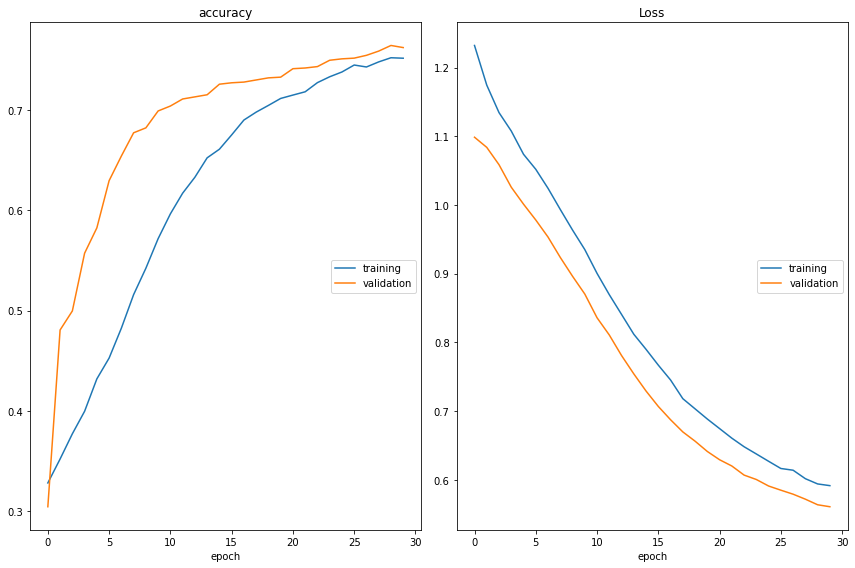

accuracy
	training         	 (min:    0.328, max:    0.752, cur:    0.752)
	validation       	 (min:    0.305, max:    0.764, cur:    0.762)
Loss
	training         	 (min:    0.591, max:    1.232, cur:    0.591)
	validation       	 (min:    0.561, max:    1.099, cur:    0.561)
201/201 [==============================] - 140s 694ms/step - loss: 0.5869 - accuracy: 0.7539 - val_loss: 0.5608 - val_accuracy: 0.7621


In [10]:
curr_model = fit_model()

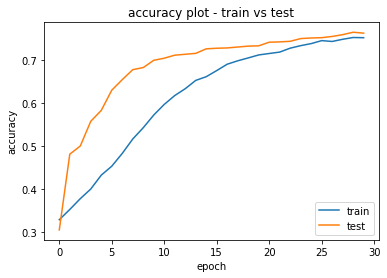

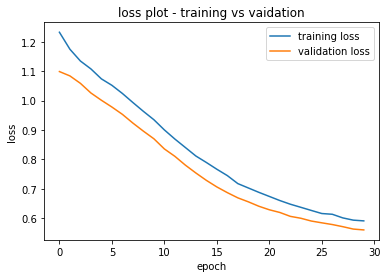

In [11]:
#Plotting the data

plt.plot(curr_model.history['accuracy'])
plt.plot(curr_model.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(curr_model.history['loss'])
plt.plot(curr_model.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [12]:
evaluate_metrics = model.evaluate(X1_test, Y1_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

24/24 [==============================] - 3s 122ms/step - loss: 0.5781 - accuracy: 0.7533

Evaluation Accuracy =  75.33% 
Evaluation loss =  0.578128


In [13]:
#Load data onto the machine for testing

def load_test_data():
    images = []
    names = []
    size = 200,200
    for image in mylistdir(train_lung_dir):
        for file in mylistdir(train_lung_dir + '/' + image):
            fpath = train_lung_dir + '/' + image + '/' + file
            temp = cv2.imread(fpath)
            temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        try:
            temp = cv2.resize(temp, size, cv2.INTER_AREA)
        except cv2.error as e:
            print('your images are broken!')
        cv2.waitKey()
        images.append(temp)
        names.append(image)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

test_images, test_img_names = load_test_data()

In [14]:
predictions = [model.predict_classes(image.reshape(1,200,200,1))[0] for image in test_images]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [15]:
def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_lung_dict:
            if predictions[i] == labels_lung_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)

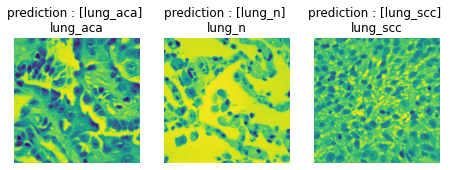

In [16]:
predfigure = plt.figure(figsize = (13,13))
def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return

image_index = 0
row = 1
col = 5
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, test_images[image_index], test_img_names[image_index], predictions[image_index], predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [17]:
################################      COLON TRAINING     ###############################################

In [18]:
labels_colon_dict = {'colon_aca':0,'colon_n':1}


def load_colon_data():
    """
    Loads data and preprocess. Returns train and test data along with labels.
    """
    
    
    images = []
    labels = []
    size = 200,200
    print("LOADING DATA FROM : ",end = "")
    for folder in mylistdir(train_colon_dir):
        print(folder, end = ' | ')
        for image in mylistdir(train_colon_dir + "/" + folder):
            temp_img = cv2.imread(train_colon_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            images.append(temp_img)
            labels.append(labels_colon_dict[folder])
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = tf.keras.utils.to_categorical(labels)
    
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(images, labels, test_size = 0.05)
    
    print()
    print('Loaded', len(X2_train),'images for training,','Train data shape =',X2_train.shape)
    print('Loaded', len(X2_test),'images for testing','Test data shape =',X2_test.shape)
    
    return X2_train, X2_test, Y2_train, Y2_test

In [19]:
X2_train, X2_test, Y2_train, Y2_test = load_colon_data()

LOADING DATA FROM : colon_n | colon_aca | 
Loaded 9500 images for training, Train data shape = (9500, 200, 200)
Loaded 500 images for testing Test data shape = (500, 200, 200)


In [20]:
#______________________________________________CNN network 2_________________________________________________________

model2 = tf.keras.models.Sequential([

tf.keras.layers.LeakyReLU(alpha = 0.1, input_shape = (200,200,1)),
    
#1st layer
tf.keras.layers.Conv2D(128,(5,5), padding = 'same'),
tf.keras.layers.Activation('relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (4,4)),


#2nd layer
tf.keras.layers.Conv2D(256,(3,3), padding = 'same'),
tf.keras.layers.Activation('relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),


#3rd layer
tf.keras.layers.Conv2D(512,(3,3), padding = 'same'),
tf.keras.layers.Activation('relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

          
# #4th layer
# tf.keras.layers.Conv3D(256,(3,3,3), padding = 'same'),
# tf.keras.layers.Activation('relu'),
# tf.keras.layers.MaxPooling3D(pool_size = (2,2,2)),

    
# #5th layer
# tf.keras.layers.Conv2D(256,(3,3), padding = 'same'),
# tf.keras.layers.Activation('relu'),
# tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    



          
#Flatten
tf.keras.layers.Flatten(),
#tf.keras.layers.Dropout(0.5),
tf.keras.layers.BatchNormalization(),
          
#FullyConnected 1st layer
tf.keras.layers.Dense(1024),
tf.keras.layers.Activation('relu'),
        

          
#FullyConnected 2nd layer
tf.keras.layers.Dense(1024),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation('relu'),
#tf.keras.layers.Dropout(0.25),
    

          
tf.keras.layers.Dense(2, activation='softmax')
          
])
          
opt = SGD(lr=0.0001)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
leaky_re_lu_1 (LeakyReLU)    (None, 200, 200, 1)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 200, 200, 128)     3328      
_________________________________________________________________
activation_4 (Activation)    (None, 200, 200, 128)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 256)       295168    
_________________________________________________________________
activation_5 (Activation)    (None, 50, 50, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 256)      

In [21]:
epochs = 10
batch_size = 64

callbacks = [PlotLossesKerasTF()]

def fit_model2():
    history = model2.fit(X2_train, Y2_train, batch_size = batch_size, epochs = epochs, validation_split = 0.1,callbacks=callbacks,  verbose= 1)
    return history

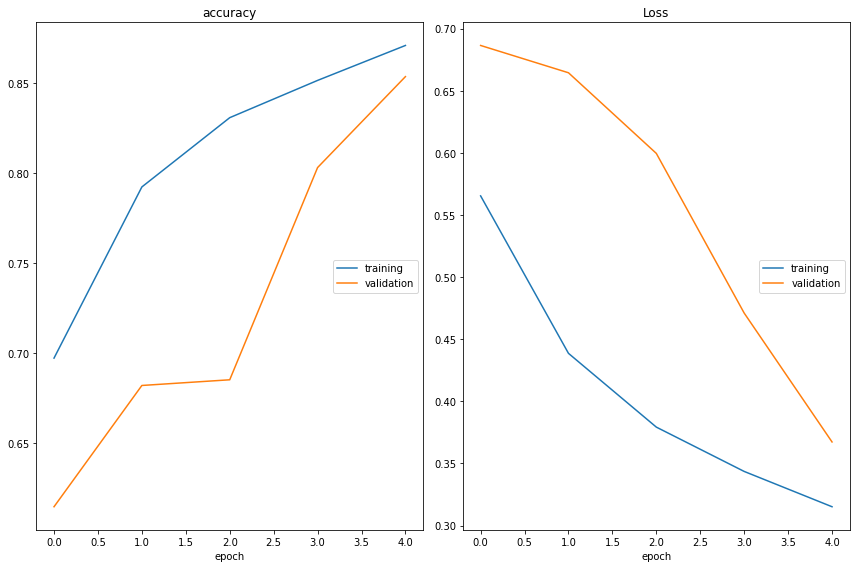

accuracy
	training         	 (min:    0.697, max:    0.871, cur:    0.871)
	validation       	 (min:    0.615, max:    0.854, cur:    0.854)
Loss
	training         	 (min:    0.315, max:    0.565, cur:    0.315)
	validation       	 (min:    0.367, max:    0.686, cur:    0.367)
134/134 [==============================] - 905s 7s/step - loss: 0.3197 - accuracy: 0.8683 - val_loss: 0.3673 - val_accuracy: 0.8537
Epoch 6/30
118/134 [=========================>....] - ETA: 1:59 - loss: 0.2890 - accuracy: 0.8823

KeyboardInterrupt: 

In [22]:
curr_model2 = fit_model2()

In [23]:
evaluate_metrics2 = model2.evaluate(X2_test, Y2_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

15/15 [==============================] - 30s 2s/step - loss: 0.3656 - accuracy: 0.8347

Evaluation Accuracy =  75.33% 
Evaluation loss =  0.578128


In [24]:
#Load data onto the machine for testing

def load_test_data():
    images = []
    names = []
    size = 200,200
    for image in mylistdir(train_colon_dir):
        for file in mylistdir(train_colon_dir + '/' + image):
            fpath = train_colon_dir + '/' + image + '/' + file
            temp = cv2.imread(fpath)
            temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
        try:
            temp = cv2.resize(temp, size, cv2.INTER_AREA)
        except cv2.error as e:
            print('your images are broken!')
        cv2.waitKey()
        images.append(temp)
        names.append(image)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

test_images, test_img_names = load_test_data()

In [25]:
predictions = [model.predict_classes(image.reshape(1,200,200,1))[0] for image in test_images]

In [26]:
def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_colon_dict:
            if predictions[i] == labels_colon_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)

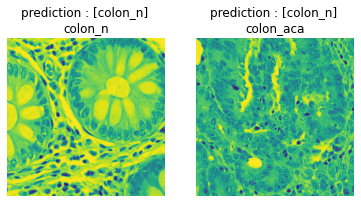

In [27]:
predfigure = plt.figure(figsize = (13,13))
def plot_image_2(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return

image_index = 0
row = 1
col = 4
for i in range(1,(row*col-1)):
    plot_image_2(predfigure, test_images[image_index], test_img_names[image_index], predictions[image_index], predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()